# Correlated Brownian Motion via Cholesky Decomposition

Cholesky decomposition is a matrix factorization technique used to generate **correlated Brownian motions** from independent Brownian motions. Given a **correlation matrix** \( \Sigma \), we compute its **Cholesky decomposition**:

$$
Correlation Matrix = \Sigma = L L^T
$$

where \( L \) is a lower triangular matrix. Using independent Brownian motions \( W_t \), we generate correlated Brownian motions \( Z_t \) as:

$$
Z_t = L W_t
$$

### **Key Applications**
- **Monte Carlo Simulations** for pricing derivatives
- **Risk Management** to model asset correlations
- **Stochastic Volatility Models** (e.g., Heston model)
- **Portfolio Optimization** in financial markets

This technique ensures that simulated asset paths reflect real-world correlation structures.


## Correlated Brownian Motion using Cholesky Decomposition

We start with independent Brownian motions:

$$
W = \begin{bmatrix} W_1 \\ W_2 \end{bmatrix}
$$

Each component follows:

$$
dW_i = \mathcal{N}(0, dt)
$$

The correlation matrix is:

$$
C = \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}
$$

The Cholesky decomposition provides a lower triangular matrix:

$$
L = \begin{bmatrix} 1 & 0 \\ \rho & \sqrt{1-\rho^2} \end{bmatrix}
$$

To generate **correlated** Brownian motions:

$$
Z = L W
$$

Expanding:

$$
\begin{bmatrix} Z_1 \\ Z_2 \end{bmatrix} = 
\begin{bmatrix} 1 & 0 \\ \rho & \sqrt{1-\rho^2} \end{bmatrix}
\begin{bmatrix} W_1 \\ W_2 \end{bmatrix}
$$

Thus, the correlated processes are:

$$
Z_1 = W_1
$$

$$
Z_2 = \rho W_1 + \sqrt{1-\rho^2} W_2
$$

---

## Recovering Independent Brownian Motion

To remove correlation, we apply the inverse of \( L \):

$$
L^{-1} = \begin{bmatrix} 1 & 0 \\ -\frac{\rho}{\sqrt{1-\rho^2}} & \frac{1}{\sqrt{1-\rho^2}} \end{bmatrix}
$$

Applying this transformation:

$$
W_{\text{recovered}} = L^{-1} Z
$$

Expanding:

$$
\begin{bmatrix} W_1' \\ W_2' \end{bmatrix} =
\begin{bmatrix} 1 & 0 \\ -\frac{\rho}{\sqrt{1-\rho^2}} & \frac{1}{\sqrt{1-\rho^2}} \end{bmatrix}
\begin{bmatrix} Z_1 \\ Z_2 \end{bmatrix}
$$

Since \( Z_1 = W_1 \), we get:

$$
W_1' = W_1
$$

And for \( W_2' \):

$$
W_2' = -\frac{\rho}{\sqrt{1-\rho^2}} Z_1 + \frac{1}{\sqrt{1-\rho^2}} Z_2
$$

Substituting \( Z_2 = \rho W_1 + \sqrt{1-\rho^2} W_2 \):

$$
W_2' = -\frac{\rho}{\sqrt{1-\rho^2}} W_1 + \frac{1}{\sqrt{1-\rho^2}} (\rho W_1 + \sqrt{1-\rho^2} W_2)
$$

Simplifying:

$$
W_2' = W_2
$$

Thus, \( W_1' \) and \( W_2' \) are independent again.

---

### Key Takeaways:
1. **To generate correlation** → Use the Cholesky factor \( L \).
2. **To remove correlation** → Apply the inverse \( L^{-1} \).



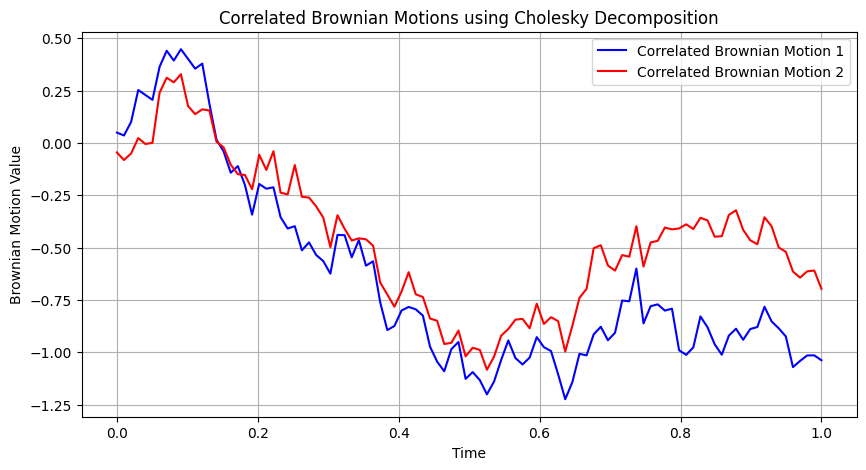

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_assets = 2          # Number of correlated Brownian motions
num_steps = 100         # Time steps
T = 1                   # Total time (years)
dt = T / num_steps      # Time step size

# Correlation matrix (must be positive definite & symmetric)
corr_matrix = np.array([[1.0, 0.8],  # Correlation between assets
                        [0.8, 1.0]])

# Cholesky decomposition (L * L^T = corr_matrix)
L = np.linalg.cholesky(corr_matrix)

# Simulate independent Brownian motions
np.random.seed(42)  # Fix seed for reproducibility
W = np.random.normal(0, np.sqrt(dt), (num_assets, num_steps))

# Generate correlated Brownian motions
Z = L @ W  # Matrix multiplication

# Plot results
time = np.linspace(0, T, num_steps)

plt.figure(figsize=(10, 5))
plt.plot(time, np.cumsum(Z[0, :]), label="Correlated Brownian Motion 1", color="blue")
plt.plot(time, np.cumsum(Z[1, :]), label="Correlated Brownian Motion 2", color="red")
plt.xlabel("Time")
plt.ylabel("Brownian Motion Value")
plt.title("Correlated Brownian Motions using Cholesky Decomposition")
plt.legend()
plt.grid()
plt.show()


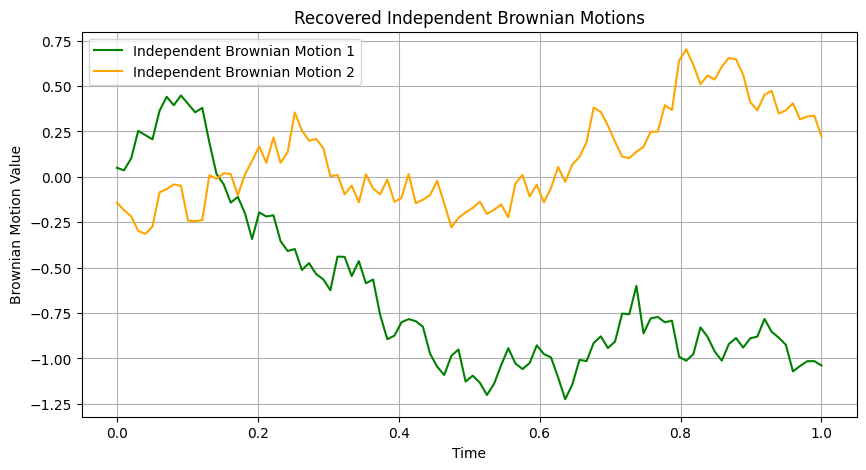

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_assets = 2          
num_steps = 100         
T = 1                   
dt = T / num_steps      

# Correlation matrix (positive definite & symmetric)
corr_matrix = np.array([[1.0, 0.8],  
                        [0.8, 1.0]])

# Cholesky decomposition
L = np.linalg.cholesky(corr_matrix)

# Simulate independent Brownian motions
np.random.seed(42)  
W = np.random.normal(0, np.sqrt(dt), (num_assets, num_steps))

# Generate correlated Brownian motions
Z = L @ W  

# Convert correlated motions back into independent motions
L_inv = np.linalg.inv(L)  # Inverse of Cholesky matrix
W_recovered = L_inv @ Z   # Applying inverse transformation

# Plot results
time = np.linspace(0, T, num_steps)

plt.figure(figsize=(10, 5))
plt.plot(time, np.cumsum(W_recovered[0, :]), label="Independent Brownian Motion 1", color="green")
plt.plot(time, np.cumsum(W_recovered[1, :]), label="Independent Brownian Motion 2", color="orange")
plt.xlabel("Time")
plt.ylabel("Brownian Motion Value")
plt.title("Recovered Independent Brownian Motions")
plt.legend()
plt.grid()
plt.show()
